Part I (60 points):  Apply Classification approaches on FashionMNIST Dataset




In [2]:
import tensorflow
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import NotFittedError
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import joblib


In [3]:
fashion_minst = keras.datasets.fashion_mnist

In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

(5 points). Prepare the Fashion MNIST dataset

Following the steps in our textbook P297-298 (Chapter 10) to load the FashionMNIST dataset from keras package into python.

Requirement: the FashionMNIST image data should be prepared and saved into the following six variables (X_train, X_valid, X_test, y_train, y_valid, y_test) with proper dimensions.



In [5]:
(x_train_full,y_train_full),(x_test,y_test)=fashion_minst.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [6]:
print(x_train_full.shape)
print(y_train_full.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


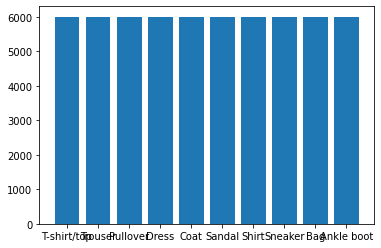

In [7]:
df=pd.DataFrame(y_train_full)
fre_val=df.value_counts()
fre_val

plt.bar(class_names,fre_val)
plt.show()

In [8]:
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [9]:
print(x_train.shape)
print(y_train.shape)
print(x_valid.shape)
print(y_valid.shape)

(55000, 28, 28)
(55000,)
(5000, 28, 28)
(5000,)


In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Step 3 (5 points). Examine the frequency of classes in train, validation, and test set. 
Write codes to check the number of samples for every class in train, validation, and test set. We need to check if the data set is balanced or imbalanced dataset. You can either print out the class frequency, or visualize the class frequency.

In [11]:
df=pd.DataFrame(y_train)
df1=pd.DataFrame(y_valid)
df2=pd.DataFrame(y_test)
fre_val_train=df.value_counts()
fre_val_valid=df1.value_counts()
fre_val_test=df2.value_counts()

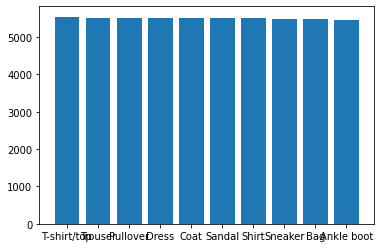

In [12]:

plt.bar(class_names,fre_val_train)
plt.show()

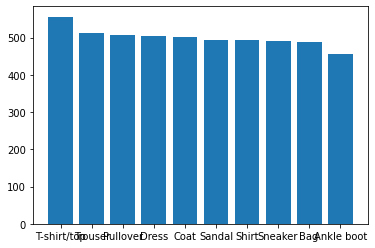

In [13]:
plt.bar(class_names,fre_val_valid)
plt.show()

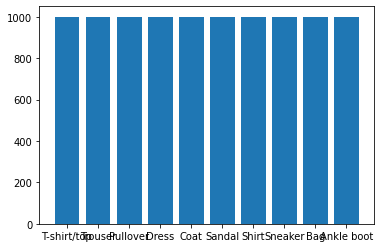

In [14]:
plt.bar(class_names,fre_val_test)
plt.show()

In [15]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [16]:
def evaluate_accuracy(x_val,predict_value):
  accuracy_value1=accuracy_score(x_val,predict_value)
  matrix = confusion_matrix(x_val,predict_value)
  per_class_acc=matrix.diagonal()/matrix.sum(axis=1)
  return accuracy_value1, per_class_acc

Step 2 (5 points). Visualize the sample images

Requirement: randomly select 9 instances from the training set, and write codes to visualize the instances as image using matplotlib. All the nine images should be organized into 3 by 3 grids using the function 'plt.subplot()' and save in the one figure.


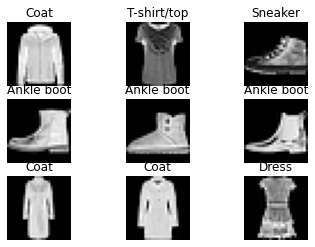

In [18]:
for i in range(9):	
  plt.subplot(330 + 1 + i)
  plt.axis("OFF")
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  plt.title(class_names[y_train[i]])
plt.show()


In [19]:
x_train_flatten=x_train.reshape(55000,28*28)
x_train_flatten.shape

(55000, 784)

In [20]:
x_valid_flatten=x_valid.reshape(5000,28*28)
x_valid_flatten.shape

(5000, 784)

In [21]:
x_test_flatten=x_test.reshape(10000,28*28)
x_test_flatten.shape

(10000, 784)

(45 points) Build several classification models. The example codes will be provided. You need to fit each machine learning model on the training set (55000 images) and make predictions on the validation set (5000 images) and  test set (5000 images). Before starting the coding, please review/read the corresponding sections in the textbook.


(9 points) K Nearest-neighbors:

Training the KNN model  (try any K value as you wish) on the training set (55000 images), and report the running time during the prediction process on the validation set (5000 images).


In [23]:
KNN_classifier=KNeighborsClassifier(n_neighbors=4)
KNN_classifier.fit(x_train_flatten,y_train)

KNeighborsClassifier(n_neighbors=4)

In [24]:
import time
start = time.time()

#Run your codes here
predited_value=KNN_classifier.predict(x_test_flatten)

end = time.time()
time_duration = end-start
print("Program finishes in {} seconds:".format(time_duration))

Program finishes in 32.490609645843506 seconds:


  (2 points) Calculate the overall accuracy of the predictions over training set and validation set.

In [25]:
predited_value1=KNN_classifier.predict(x_valid_flatten)
predited_value1

array([9, 0, 0, ..., 5, 8, 3], dtype=uint8)

In [26]:
predited_value_knn_train=KNN_classifier.predict(x_train_flatten)

In [30]:
accuracy_train,per_train_acc=evaluate_accuracy(y_train,predited_value_knn_train)
accuracy_valid,per_valid_acc=evaluate_accuracy(y_valid,predited_value1)
accuracy_test,per_test_acc=evaluate_accuracy(y_test,predited_value)

In [31]:
print("accuracy_value_test",accuracy_test)
print("accuracy_value_train",accuracy_train)
print("accuracy_value_valid",accuracy_valid)

accuracy_value_test 0.8558
accuracy_value_train 0.9066909090909091
accuracy_value_valid 0.863


Calculate the per-class accuracy of the predictions over training set and validation set.. For instance, among images of every class, how many of them are correctly predicted. 

In [33]:
print("per_class_accruacy_train: ",per_train_acc)
print(" ")
print("per_class_accruacy_test: ",per_test_acc)
print(" ")
print("per_class_accruacy_valid: ",per_valid_acc)

per_class_accruacy_train:  [0.94966625 0.98475386 0.90174672 0.92053101 0.8271045  0.9213728
 0.65407663 0.97995627 0.96370236 0.96505278]
 
per_class_accruacy_test:  [0.882 0.971 0.829 0.866 0.739 0.852 0.548 0.969 0.949 0.953]
 
per_class_accruacy_valid:  [0.89715536 0.97302158 0.82539683 0.88822355 0.75204918 0.88438134
 0.51115619 0.97265625 0.94897959 0.95849802]


Try different K values, and select the best model that has highest validation accuracy.  Make the predictions on test set (10000 images). And visualize the classification confusion matrix to check the details of predictions over every class. Report the classification on test set.

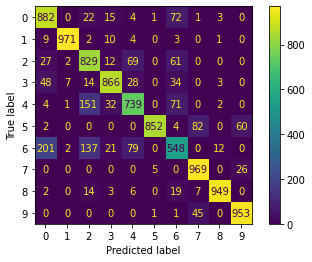

In [36]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, predited_value)
plt.show()

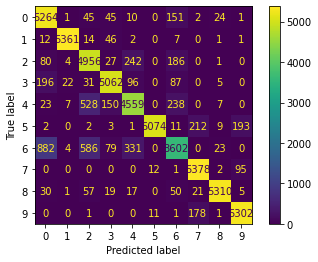

In [109]:
ConfusionMatrixDisplay.from_predictions(y_train, predited_value_knn_train)
plt.show()

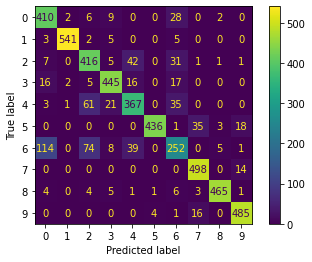

In [37]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_valid, predited_value1)
plt.show()

 (1 points) Save the trained model to disk.

In [38]:
model4 = KNeighborsClassifier(n_neighbors=4)
model4.fit(x_train_flatten, y_train)
# save the model to disk
filename4 = 'Knmodel.sav'
joblib.dump(model4, filename4)

['Knmodel.sav']

In [39]:
loaded_model = joblib.load(filename4)
result = loaded_model.predict(x_test_flatten)

Task 4.2: Softmax regression: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.htmlLinks to an external site.

Task 4.2.1:  (3 points)  Review chapter 4, P148-P151. Answer the following questions in your notebook

Q1: How is the softmax regression used for multi-class classification?
      the logistic regresssion model can be genralised to support multiple classess directly,without having to train and multiple binary classfier. this is called softmax regression. when we give a instance x, the softmax regression predcits the prpbability for each class. the class which has the highest probability is our predicted class.

: What's the cost function for softmax regression to implement the multi-class classification?
    Cross entropy cost fucntion Equation 4-22. Cross entropy cost function • J Θ = − 1 m ∑ m i = 1 In this equation: ∑ K k = 1 y i k log pi k

2 points) Review the codes in chapter 4, P150-P151 to build softmax models. Train the model on the training set (55000 images), and report the running time during the prediction process on the validation set (5000 images


In [40]:
from sklearn.linear_model import LogisticRegression
softmax_regression = LogisticRegression(multi_class='multinomial', solver='lbfgs')
softmax_regression.fit(x_train_flatten, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(multi_class='multinomial')

In [41]:
import time
start = time.time()

softmax_prediction1 = softmax_regression.predict(x_test_flatten)
end = time.time()
time_duration = end-start
print("Program finishes in {} seconds:".format(time_duration))

Program finishes in 0.04075455665588379 seconds:


In [42]:
softmax_prediction2 = softmax_regression.predict(x_train_flatten)

In [43]:
softmax_prediction3=softmax_regression.predict(x_valid_flatten)

  (2 points) Calculate the overall accuracy of the predictions over training set and validation set. 




In [44]:
accuracy_train,per_train_acc=evaluate_accuracy(y_train,softmax_prediction2)
accuracy_valid,per_valid_acc=evaluate_accuracy(y_valid,softmax_prediction3)
accuracy_test,per_test_acc=evaluate_accuracy(y_test,softmax_prediction1)

In [45]:
print(accuracy_test)
print(accuracy_train)
print(accuracy_valid)

0.8403
0.8638363636363636
0.8546


 (2 points) Calculate the per-class accuracy of the predictions over training set and validation set. For instance, among images of every class, how many of them are correctly predicted. 



In [46]:
print("per_class_accruacy_train: ",per_train_acc)
print(" ")
print("per_class_accruacy_test: ",per_test_acc)
print(" ")
print("per_class_accruacy_valid: ",per_valid_acc)

per_class_accruacy_train:  [0.8480967  0.96693608 0.77165211 0.87888707 0.8149492  0.91229344
 0.60232431 0.94059767 0.95245009 0.95176556]
 
per_class_accruacy_test:  [0.809 0.96  0.739 0.856 0.773 0.893 0.55  0.933 0.947 0.943]
 
per_class_accruacy_valid:  [0.82932166 0.97122302 0.74404762 0.88223553 0.79303279 0.9188641
 0.55983773 0.92578125 0.95102041 0.95059289]


(2 points) Try different C values, and select the best model that has highest validation accuracy.  Make the predictions on test set (10000 images). And visualize the classification confusion matrix to check the details of predictions over every class. Report the classification on test set.

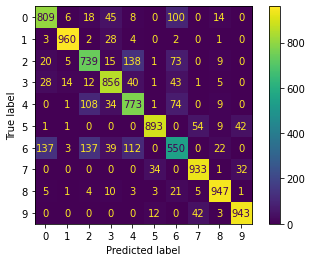

In [47]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, softmax_prediction1)
plt.show()

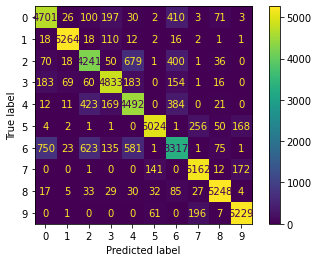

In [108]:
ConfusionMatrixDisplay.from_predictions(y_train, softmax_prediction2)
plt.show()

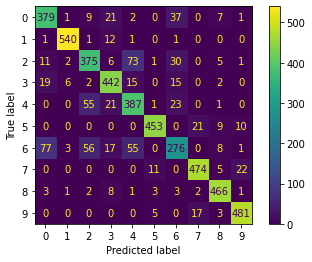

In [48]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_valid, softmax_prediction3)
plt.show()

(1 points) Save the trained model to disk.

In [49]:
model1 = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model1.fit(x_train_flatten, y_train)
# save the model to disk
filename1 = 'softmax.sav'
joblib.dump(model1, filename1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


['softmax.sav']

In [50]:
loaded_model = joblib.load(filename1)
result = loaded_model.predict(x_test_flatten)

15 points) Build a simple neural network using Keras.

In [51]:
x_train_normalise=x_train/255.0
x_test_normalise=x_test/255.0
x_valid_normalise=x_valid/255.0

In [52]:
x_train_normalise.shape

(55000, 28, 28)

In [53]:
x_train_normalise_flatten=x_train_normalise.reshape(-1,28*28)
x_test_normalise_flatten=x_test_normalise.reshape(-1,28*28)
x_valid_normalise_flatten=x_valid_normalise.reshape(-1,28*28)


In [54]:
x_train_normalise_flatten.shape

(55000, 784)

In [55]:
from keras.models import Sequential
from keras.layers import Dense

In [56]:
model_simple=Sequential()
model_simple.add(tf.keras.layers.Dense(units=128,activation='relu',input_shape=(784,)))
model_simple.add(tf.keras.layers.Dense(units=10,activation='softmax'))
model_simple.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model_simple.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


(2 points) Calculate the overall accuracy of the predictions over training set and validation set. 


In [57]:
train_history = model_simple.fit(x_train_normalise_flatten,y_train, validation_data=(x_valid_flatten,y_valid), batch_size=32, epochs = 10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1719/1719 [==============================] - 7s 3ms/step - loss: 0.5006 - accuracy: 0.8229 - val_loss: 51.7436 - val_accuracy: 0.8540
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3779 - accuracy: 0.8637 - val_loss: 51.4849 - val_accuracy: 0.8582
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3374 - accuracy: 0.8753 - val_loss: 47.3461 - val_accuracy: 0.8646
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3103 - accuracy: 0.8864 - val_loss: 47.4359 - val_accuracy: 0.8758
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2933 - accuracy: 0.8931 - val_loss: 51.8624 - val_accuracy: 0.8604
Epoch 6/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.2785 - accuracy: 0.8975 - val_loss: 47.1115 - val_accuracy: 0.8766
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9018 - val_loss: 55.1112 - val_accuracy: 0.8

  (2 points) Calculate the overall accuracy of the predictions over training set and validation set.

In [58]:
model_simple.evaluate(x_test_normalise_flatten,y_test)

 43/313 [===>..........................] - ETA: 0s - loss: 0.3282 - accuracy: 0.8852

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 1s 2ms/step - loss: 0.3354 - accuracy: 0.8800


[0.3353787660598755, 0.8799999952316284]

In [59]:
model_simple.evaluate(x_train_normalise_flatten,y_train)

1719/1719 [==============================] - 4s 2ms/step - loss: 0.2229 - accuracy: 0.9186


[0.2228984236717224, 0.9186363816261292]

In [60]:
val_simple=np.argmax(model_simple.predict(x_valid_normalise_flatten),axis=1)

In [61]:
val_simple_test=np.argmax(model_simple.predict(x_test_normalise_flatten),axis=1)

In [62]:
val_simple_train=np.argmax(model_simple.predict(x_train_normalise_flatten),axis=1)

In [63]:
accuracy_train,per_train_acc=evaluate_accuracy(y_train,val_simple_train)
accuracy_valid,per_valid_acc=evaluate_accuracy(y_valid,val_simple)
accuracy_test,per_test_acc=evaluate_accuracy(y_test,val_simple_test)


In [64]:
print(accuracy_valid)
print(accuracy_train)
print(accuracy_test)

0.8942
0.9186363636363636
0.88


Calculate the per-class accuracy of the predictions over training set and validation set. For instance, among images of every class, how many of them are correctly predicted. 

In [65]:
print("per_class_accruacy_train: ",per_train_acc)
print(" ")
print("per_class_accruacy_test: ",per_test_acc)
print(" ")
print("per_class_accruacy_valid: ",per_valid_acc)

per_class_accruacy_train:  [0.84232365 0.99504041 0.84825328 0.89198036 0.90529753 0.99455239
 0.78736154 0.98688047 0.98820327 0.94794321]
 
per_class_accruacy_test:  [0.782 0.98  0.794 0.849 0.868 0.972 0.702 0.972 0.973 0.908]
 
per_class_accruacy_valid:  [0.80306346 0.98741007 0.8015873  0.8742515  0.90368852 0.98985801
 0.70182556 0.96679688 0.97142857 0.9229249 ]


Visualize the classification confusion matrix to check the details of the predictions for each class over test set (10000 images). Report the classification accuracy on test set.

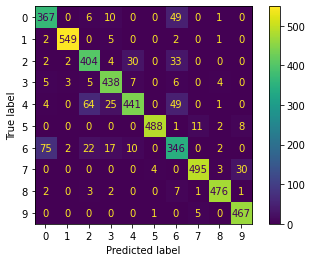

In [66]:
ConfusionMatrixDisplay.from_predictions(val_simple, y_valid)
plt.show()

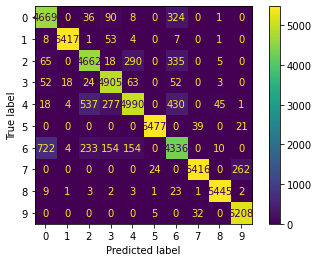

In [67]:
ConfusionMatrixDisplay.from_predictions(val_simple_train, y_train)
plt.show()

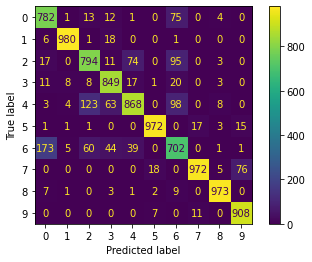

In [68]:
ConfusionMatrixDisplay.from_predictions(val_simple_test, y_test)
plt.show()

  (1 points) Save the trained model to disk.


In [69]:
filename3= 'Neural_network_simple.sav'
joblib.dump(model_simple, filename3)

INFO:tensorflow:Assets written to: ram://ea3b2198-d1b2-40da-bfe0-b4ed0f0981cb/assets


['Neural_network_simple.sav']

9 points) Build deeper neural network. Summarize the results of new model, and compare them with models in Task 4.1 & 4.2 & 4.3. 
Screen Shot 2022-06-18 at 10.04.19 AM.png

2 points) Correctly increase model complexity of neural network by adding more hidden layers and nodes (i.e., 3 hidden layers, 1000 hidden nodes, epoch 50). 

In [70]:
from keras.layers import BatchNormalization


In [71]:
model3=Sequential()

In [72]:
model3.add(tf.keras.layers.Dense(units=1280,activation='relu',input_shape=(784,)))


In [73]:
model3.add(tf.keras.layers.Dense(units=1280,activation='relu',input_shape=(784,)))

In [74]:
model3.add(tf.keras.layers.Dense(units=1280,activation='relu',input_shape=(784,)))

In [75]:
model3.add(BatchNormalization())

In [76]:
model3.add(tf.keras.layers.Dropout(0.2))

In [77]:
model3.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [78]:
model3.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [79]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1280)              1004800   
                                                                 
 dense_3 (Dense)             (None, 1280)              1639680   
                                                                 
 dense_4 (Dense)             (None, 1280)              1639680   
                                                                 
 batch_normalization (BatchN  (None, 1280)             5120      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                12810     
                                                      

In [80]:
model3.fit(x_train_normalise_flatten,y_train,validation_data=(x_valid_flatten,y_valid),batch_size=100,epochs=50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


550/550 [==============================] - 3s 4ms/step - loss: 0.5059 - accuracy: 0.8212 - val_loss: 150.7713 - val_accuracy: 0.7650
Epoch 2/50
550/550 [==============================] - 2s 4ms/step - loss: 0.3932 - accuracy: 0.8572 - val_loss: 98.9247 - val_accuracy: 0.7980
Epoch 3/50
550/550 [==============================] - 2s 4ms/step - loss: 0.3516 - accuracy: 0.8715 - val_loss: 62.8738 - val_accuracy: 0.8590
Epoch 4/50
550/550 [==============================] - 2s 4ms/step - loss: 0.3254 - accuracy: 0.8802 - val_loss: 96.2898 - val_accuracy: 0.8024
Epoch 5/50
550/550 [==============================] - 2s 4ms/step - loss: 0.3041 - accuracy: 0.8866 - val_loss: 72.3711 - val_accuracy: 0.8240
Epoch 6/50
550/550 [==============================] - 2s 4ms/step - loss: 0.2909 - accuracy: 0.8913 - val_loss: 68.7640 - val_accuracy: 0.8512
Epoch 7/50
550/550 [==============================] - 2s 4ms/step - loss: 0.2707 - accuracy: 0.8991 - val_loss: 63.8322 - val_accuracy: 0.8542
Epoch 8/5

( 2 points) Calculate the overall accuracy of the predictions over training set and validation set. 

In [81]:
model3.evaluate(x_test_normalise_flatten,y_test)

 38/313 [==>...........................] - ETA: 0s - loss: 0.4906 - accuracy: 0.9046

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


313/313 [==============================] - 1s 3ms/step - loss: 0.5365 - accuracy: 0.8995


[0.5364933013916016, 0.8995000123977661]

In [82]:
model3.evaluate(x_train_normalise_flatten,y_train)

1719/1719 [==============================] - 5s 3ms/step - loss: 0.0438 - accuracy: 0.9836


[0.0437617227435112, 0.9835818409919739]

In [83]:
model3.evaluate(x_valid_normalise_flatten,y_valid)

157/157 [==============================] - 0s 3ms/step - loss: 0.5141 - accuracy: 0.9024


[0.5141087174415588, 0.902400016784668]

In [84]:
val=np.argmax(model3.predict(x_valid_normalise_flatten),axis=1)

In [85]:
val_test=np.argmax(model3.predict(x_test_normalise_flatten),axis=1)

In [86]:
val_train=np.argmax(model3.predict(x_train_normalise_flatten),axis=1)

 (2 points) Calculate the overall accuracy of the predictions over training set and validation set. 

In [87]:
accuracy_train,per_train_acc=evaluate_accuracy(y_train,val_train)
accuracy_valid,per_valid_acc=evaluate_accuracy(y_valid,val)
accuracy_test,per_test_acc=evaluate_accuracy(y_test,val_test)

In [88]:
print(accuracy_test)
print(accuracy_train)
print(accuracy_valid)

0.8995
0.9835818181818182
0.9024


(2 points) Calculate the per-class accuracy of the predictions over training set and validation set. For instance, among images of every class, how many of them are correctly predicted. 

In [89]:
print("per_class_accruacy_train: ",per_train_acc)
print(" ")
print("per_class_accruacy_test: ",per_test_acc)
print(" ")
print("per_class_accruacy_valid: ",per_valid_acc)

per_class_accruacy_train:  [0.96824824 0.99981631 0.93977438 0.98381524 0.98566763 0.99981841
 0.96804068 0.99453353 0.99927405 0.99708773]
 
per_class_accruacy_test:  [0.831 0.978 0.787 0.88  0.877 0.977 0.761 0.963 0.975 0.966]
 
per_class_accruacy_valid:  [0.8380744  0.98201439 0.7718254  0.89221557 0.87704918 0.98377282
 0.73833671 0.96875    0.98163265 0.9743083 ]


(2 points) Visualize the classification confusion matrix to check the details of the predictions for each class over test set (10000 images). Report the classification accuracy on test set.

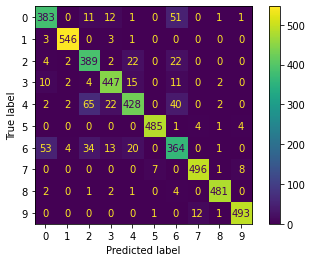

In [90]:
ConfusionMatrixDisplay.from_predictions(val, y_valid)
plt.show()

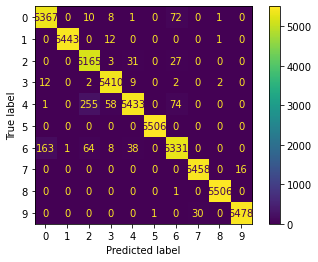

In [91]:
ConfusionMatrixDisplay.from_predictions(val_train, y_train)
plt.show()

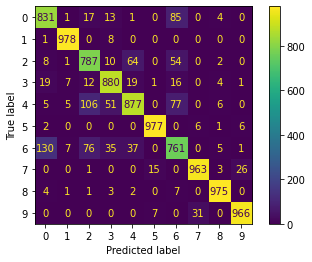

In [92]:
ConfusionMatrixDisplay.from_predictions(val_test, y_test)
plt.show()

(1 points) Save the trained model to disk.

In [93]:
filename3= 'Neural_network.sav'
joblib.dump(model3, filename3)

INFO:tensorflow:Assets written to: ram://7cfded54-cbe6-4efe-b5b5-306e325db470/assets


['Neural_network.sav']

In [94]:
loaded_model = joblib.load(filename3)
result1 = np.argmax(loaded_model.predict(x_test_normalise_flatten),axis=1)

In [95]:
loaded_model = joblib.load(filename3)
pred_proba = loaded_model.predict(x_test_normalise_flatten)


In [96]:
result1

array([9, 2, 1, ..., 8, 1, 5])

In [97]:
!pip install --quiet gradio

     |████████████████████████████████| 5.1 MB 7.6 MB/s 
     |████████████████████████████████| 57 kB 6.1 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 140 kB 72.0 MB/s 
     |████████████████████████████████| 1.1 MB 64.5 MB/s 
     |████████████████████████████████| 212 kB 73.7 MB/s 
     |████████████████████████████████| 54 kB 3.9 MB/s 
     |████████████████████████████████| 256 kB 73.6 MB/s 
     |████████████████████████████████| 2.3 MB 47.8 MB/s 
     |████████████████████████████████| 271 kB 74.5 MB/s 
     |████████████████████████████████| 144 kB 80.5 MB/s 
     |████████████████████████████████| 94 kB 4.2 MB/s 
     |████████████████████████████████| 63 kB 2.3 MB/s 
     |████████████████████████████████| 80 kB 10.9 MB/s 
     |████████████████████████████████| 43 kB 2.5 MB/s 
     |████████████████████████████████| 62 kB 1.2 MB/s 
     |████████████████████████████████| 4.0 MB 58.9 MB/s 
     |████████████████████████

In [98]:
import gradio as gr
import cv2
import os

In [99]:
input_module1 = gr.inputs.Image(shape=(28, 28),label = "Input Image",  image_mode='L')
input_module7 = gr.inputs.Dropdown(choices=["Knmodel.sav", "softmax.sav", "Neural_network.sav",'Neural_network_simple.sav'])

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [100]:
output_module1 = gr.outputs.Textbox(label = "Output Text")
output_module2=gr.outputs.Label(num_top_classes=10)

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


In [101]:
def multi_inputs(input1,file_val):
  input_val=input1
  if file_val == 'Neural_network.sav':
    x_input_normalise=input_val/255.0
    x_input_normalise_flatten= x_input_normalise.reshape(-1,28*28)
    loaded_model = joblib.load(file_val)
    probability_value=loaded_model.predict(x_input_normalise_flatten)
    probability_value=probability_value.flatten()
    result1 = np.argmax(loaded_model.predict(x_input_normalise_flatten),axis=1)
    return {class_names[i]: float(probability_value[i]) for i in range(10)}
  elif file_val == 'softmax.sav':
    input_val_flatten= input_val.reshape(-1,28*28)
    loaded_model = joblib.load(file_val)
    y_pred = loaded_model.predict(input_val_flatten)
    prediction_prob=softmax_regression.predict_proba(input_val_flatten)
    prediction_prob=prediction_prob.flatten()
    return {class_names[i]: float(prediction_prob[i]) for i in range(10)}
  elif file_val == 'Neural_network_simple.sav':
    print("saravna")
    x_input_normalise=input_val/255.0
    x_input_normalise_flatten= x_input_normalise.reshape(-1,28*28)
    loaded_model = joblib.load(file_val)
    probability_value=loaded_model.predict(x_input_normalise_flatten)
    probability_value=probability_value.flatten()
    result1 = np.argmax(loaded_model.predict(x_input_normalise_flatten),axis=1)
    return {class_names[i]: float(probability_value[i]) for i in range(10)}

  else:
    input_val_flatten=input_val.flatten().reshape(1,28*28)
    loaded_model = joblib.load(filename4)
    result = loaded_model.predict(input_val_flatten)
    prediction_prob=KNN_classifier.predict_proba(input_val_flatten)
    prediction_prob=prediction_prob.flatten()
    return {class_names[i]: float(prediction_prob[i]) for i in range(10)}



In [102]:
result1.dtype

dtype('int64')

In [103]:
def get_sample_images(num_images):
    sample_images = []
    for i in range(num_images):
      test_feature = x_test[i]
      test_feature_2d =test_feature.flatten().reshape(28,28)
    
      # Make it unsigned integers:
      data = test_feature_2d.astype(np.uint8)

      outdir =  "images_folder"
      img_path = os.path.join(outdir, 'local_%05d.png' % (i,))
      if not os.path.exists(outdir):
         os.mkdir(outdir)
      cv2.imwrite(img_path, data)

      sample_images.append([img_path,int(np.random.choice([7,9,11,13,15,24]))])   # ["image path", "K"]
    return sample_images

In [104]:
sample_images = get_sample_images(10)

In [105]:
for i in range(1,10):
  print(class_names[y_test[i]])

Pullover
Trouser
Trouser
Shirt
Trouser
Coat
Shirt
Sandal
Sneaker


In [106]:
gr.Interface(fn=multi_inputs, 
             inputs=[input_module1,input_module7], 
             outputs=[output_module2],
             examples=sample_images
            ).launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://56526.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7ff33f722ed0>,
 'http://127.0.0.1:7860/',
 'https://56526.gradio.app')